Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn
import scipy.stats as stat
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.decomposition import PCA
import statsmodels.formula.api as smf

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_excel('Toyota.xlsx')
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
cars=cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [5]:
cars.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1434 non-null   float64
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   int64  
 7   Quarterly_Tax  1436 non-null   int64  
 8   Weight         1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [7]:
cars.duplicated().sum()

1

In [8]:
cars[cars.duplicated()]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116.0,2000,5,5,234,1320


There are no duplicate value in dataset

In [9]:
# Renaming the columns name and making it short
data=cars.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


In [10]:
raw_data=data[["Price","Age","KM","HP","CC","Doors","Gears","QT","Weight"]]
raw_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [11]:
#check for missing values
raw_data.isna().sum()

Price     0
Age       0
KM        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [12]:
raw_data.dropna(inplace=True)

In [13]:
raw_data.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [14]:
raw_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,10721.836820,55.981869,68558.258717,101.513250,1576.684100,4.034868,5.026499,87.038354,1072.320084
std,3621.099059,18.589545,37514.744795,14.987975,424.509944,0.952558,0.188639,41.028975,52.475057
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87062.250000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [15]:
data=raw_data.copy()

In [16]:
#Correlation matrix
a=raw_data.corr()
a

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876362,-0.570735,0.317251,0.125624,0.188606,0.063600,0.215895,0.579296
Age,-0.876362,1.000000,0.505705,-0.157875,-0.097650,-0.150703,-0.005634,-0.196427,-0.468986
KM,-0.570735,0.505705,1.000000,-0.333913,0.102303,-0.036968,0.014937,0.278718,-0.028749
HP,0.317251,-0.157875,-0.333913,1.000000,0.036326,0.091713,0.209425,-0.297842,0.091855
CC,0.125624,-0.097650,0.102303,0.036326,1.000000,0.080441,0.014692,0.305982,0.334936
Doors,0.188606,-0.150703,-0.036968,0.091713,0.080441,1.000000,-0.160488,0.112027,0.306928
Gears,0.063600,-0.005634,0.014937,0.209425,0.014692,-0.160488,1.000000,-0.005181,0.021067
QT,0.215895,-0.196427,0.278718,-0.297842,0.305982,0.112027,-0.005181,1.000000,0.623661
Weight,0.579296,-0.468986,-0.028749,0.091855,0.334936,0.306928,0.021067,0.623661,1.000000


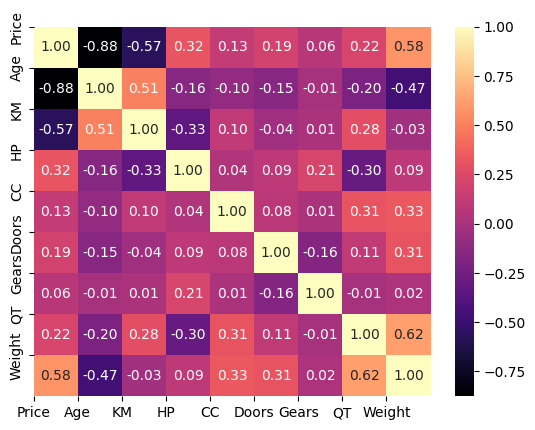

In [19]:
# Generate a heatmap
sns.heatmap(a, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(a.columns)), a.columns)

plt.yticks(range(len(a.columns)), a.columns)

plt.show()

In [20]:
data_df=pd.get_dummies(data)
data_df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [21]:
#Before transformation
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:48:04   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5511.7091   1411.853     -3.904      0.000   -8281.243   -2742.176
Age         -121.6427      2.616    -46.506      0.000    -126.774    -116.512
KM            -0.0208      0.001    -16.603      0.000      -0.023      -0.018
Weight        16.8558      1.070     15.756      0.000      14.757      18.954
HP            31.7613      2.819     11.269      0.000      26.232      37.290
CC            -0.1196      0.090     -1.328      0.184      -0.296       0.057
Gears        598.2014    197.041      3.036      0.002     211.680     984.722
QT             3.9246      1.310      2.996      0.003       1.355       6.495
Doors          2.4778     40.087      0.062      0.951     -76.158      81.113
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Before transformation
raw_data_model1 = smf.ols("Price~Age+KM+Weight+HP+Gears+QT", data = raw_data).fit()
# Finding rsquared values
raw_data_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1501.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:48:04   Log-Likelihood:                -12359.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1427   BIC:                         2.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5412.8196   1409.083     -3.841      0.000   -8176.915   -2648.724
Age         -121.6840      2.615    -46.529      0.000    -126.814    -116.554
KM            -0.0209      0.001    -16.745      0.000      -0.023      -0.018
Weight        16.6519      1.021     16.306      0.000      14.649      18.655
HP            31.4324      2.800     11.227      0.000      25.940      36.925
Gears        598.9789    193.409      3.097      0.002     219.582     978.376
QT             3.7050      1.297      2.858      0.004       1.162       6.248
==============================================================================
Omnibus:                      146.121   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.420
Skew:                          -0.195   Prob(JB):                    2.07e-208
Kurtosis:                       6.982   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Before transformation
raw_data_model2 = smf.ols("Price~Age+KM+HP+CC+Weight", data = raw_data).fit()
# Finding rsquared values
raw_data_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1776.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:48:04   Log-Likelihood:                -12368.
No. Observations:                1434   AIC:                         2.475e+04
Df Residuals:                    1428   BIC:                         2.478e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4071.7118    948.349     -4.293      0.000   -5932.019   -2211.405
Age         -122.3982      2.623    -46.661      0.000    -127.544    -117.252
KM            -0.0195      0.001    -16.059      0.000      -0.022      -0.017
HP            30.4660      2.543     11.979      0.000      25.477      35.455
CC            -0.0879      0.090     -0.978      0.328      -0.264       0.088
Weight        18.6777      0.841     22.202      0.000      17.027      20.328
==============================================================================
Omnibus:                      199.762   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1550.228
Skew:                          -0.388   Prob(JB):                         0.00
Kurtosis:                       8.034   Cond. No.                     2.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Before transformation
raw_data_model3 = smf.ols("Price~KM+HP+CC+Weight", data = raw_data).fit()
# Finding rsquared values
raw_data_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     664.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          4.94e-324
Time:                        23:48:04   Log-Likelihood:                -13032.
No. Observations:                1434   AIC:                         2.607e+04
Df Residuals:                    1429   BIC:                         2.610e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.933e+04   1236.820    -23.714      0.000   -3.18e+04   -2.69e+04
KM            -0.0505      0.002    -31.243      0.000      -0.054      -0.047
HP            22.1497      4.030      5.496      0.000      14.245      30.055
CC            -0.0998      0.143     -0.699      0.485      -0.380       0.180
Weight        38.6271      1.151     33.566      0.000      36.370      40.885
==============================================================================
Omnibus:                      376.461   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4652.132
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                      11.655   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### find how many discrete and continuous feature are their in our dataset by seperating them in variables


In [25]:
data=raw_data.copy()
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: ',len(discrete_feature))
discrete_feature


Discrete Variables Count:  5


['HP', 'CC', 'Doors', 'Gears', 'QT']

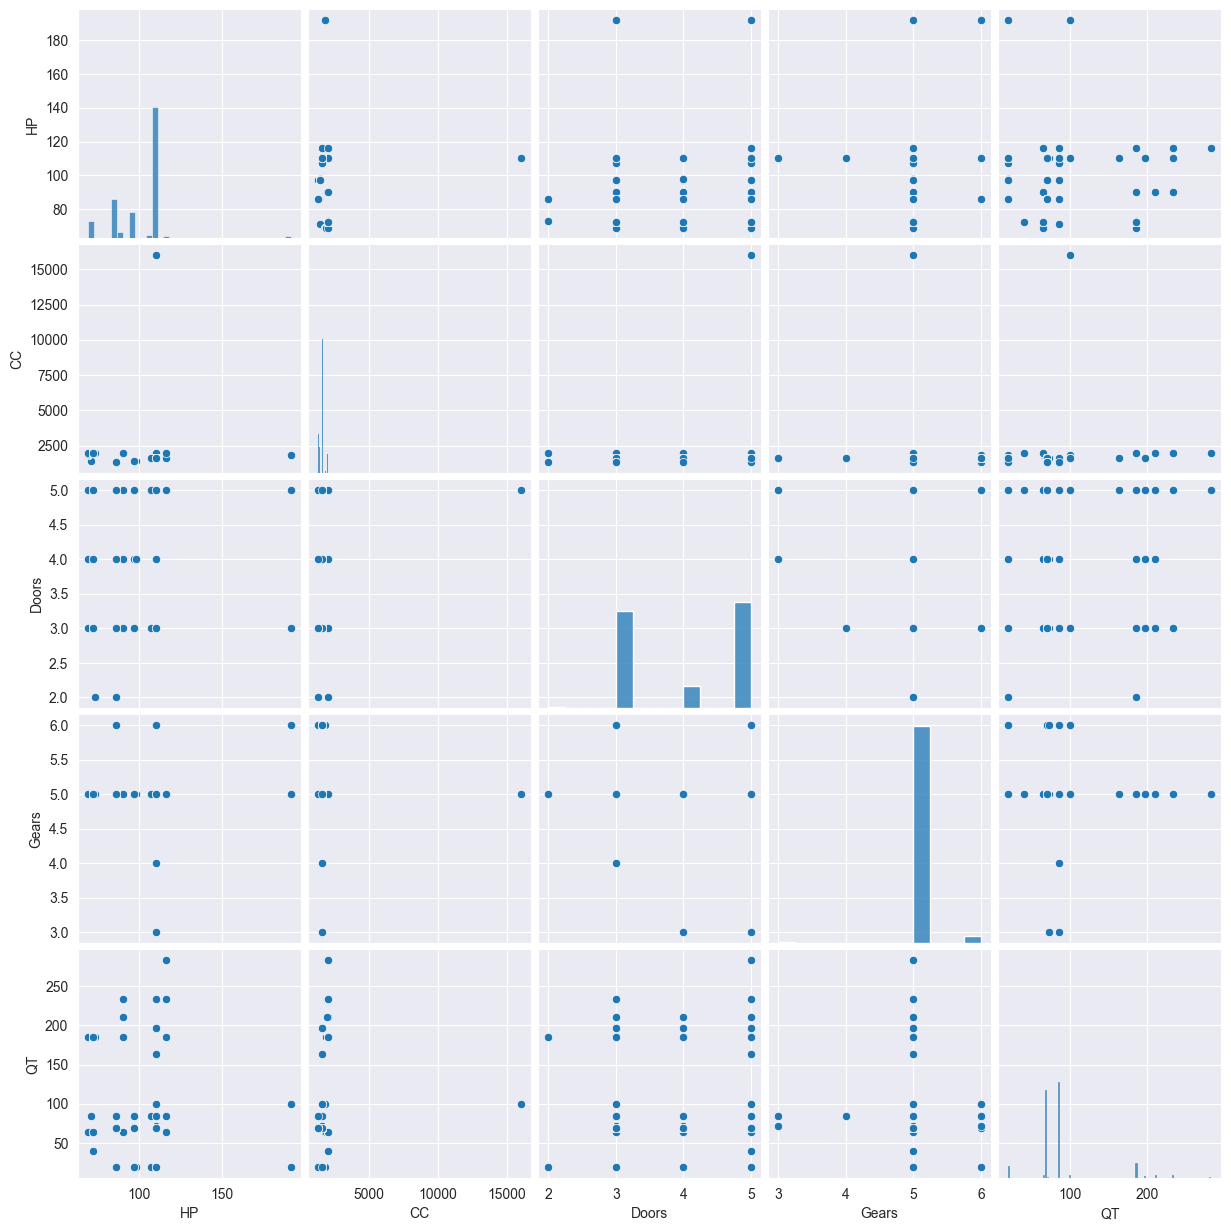

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(data[discrete_feature])

In [27]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count:',len(continuous_feature))
continuous_feature


Continuous Feature Count: 4


['Price', 'Age', 'KM', 'Weight']

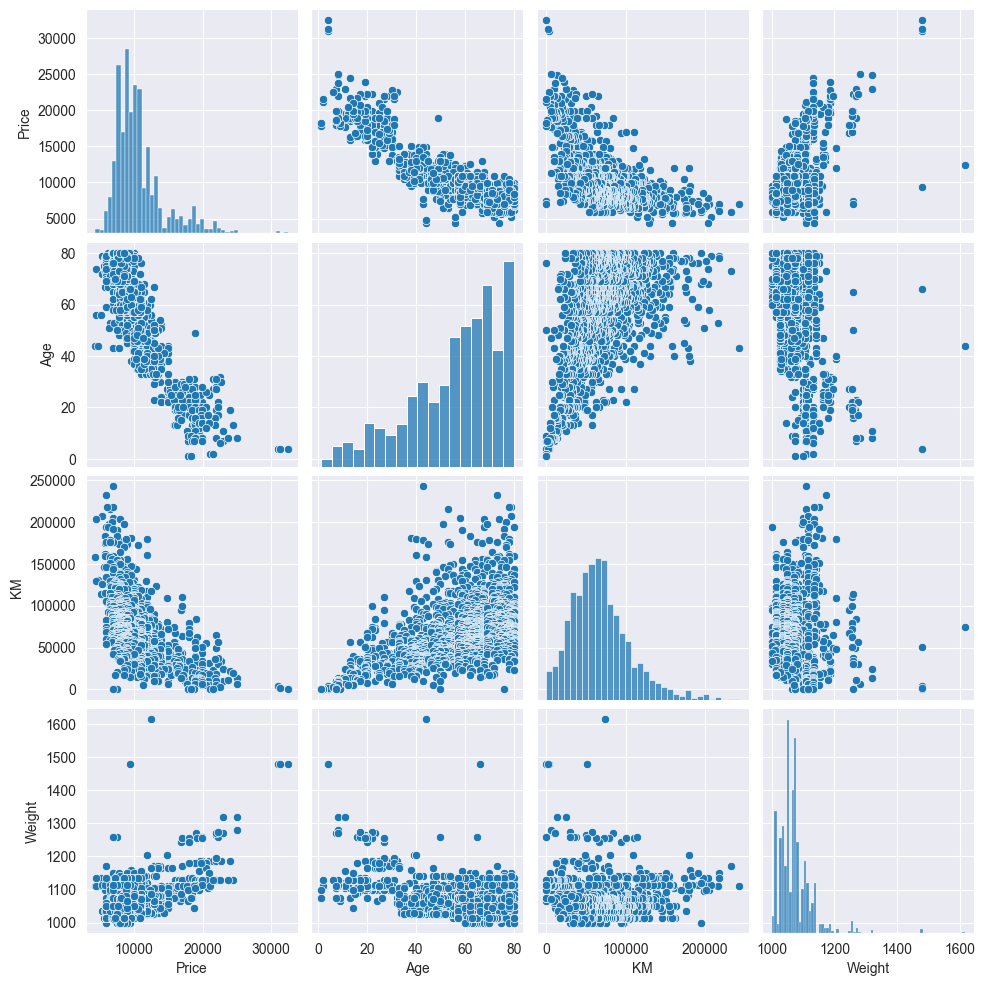

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

Age and KM has the highest score of correlation with Price but a negative correlation
1) QT and Weight also have a collinearity among themselves which will affect our model.

2) KM and Age also have a collinearity among themselves which will affect our model.

In [31]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)


Text(0.5, 1.0, 'Weight')

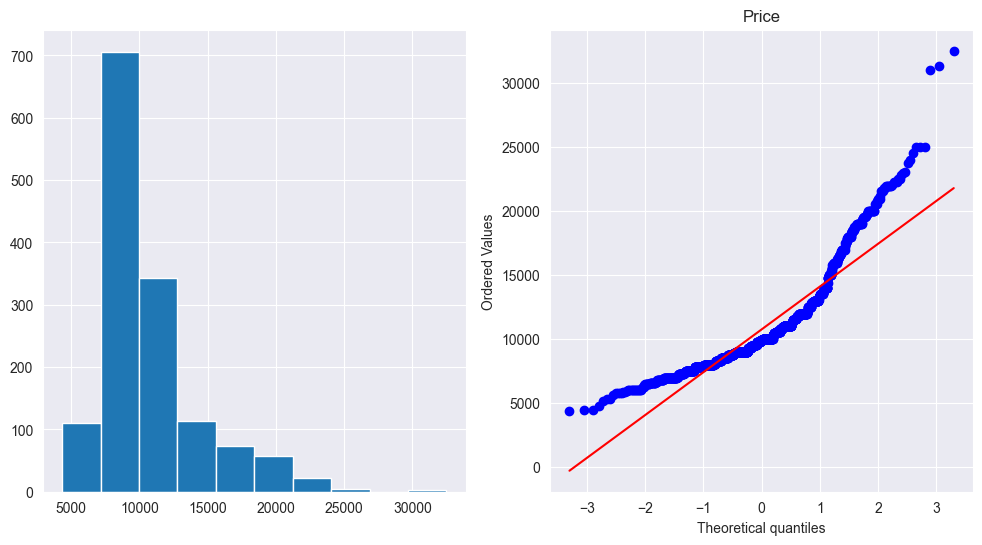

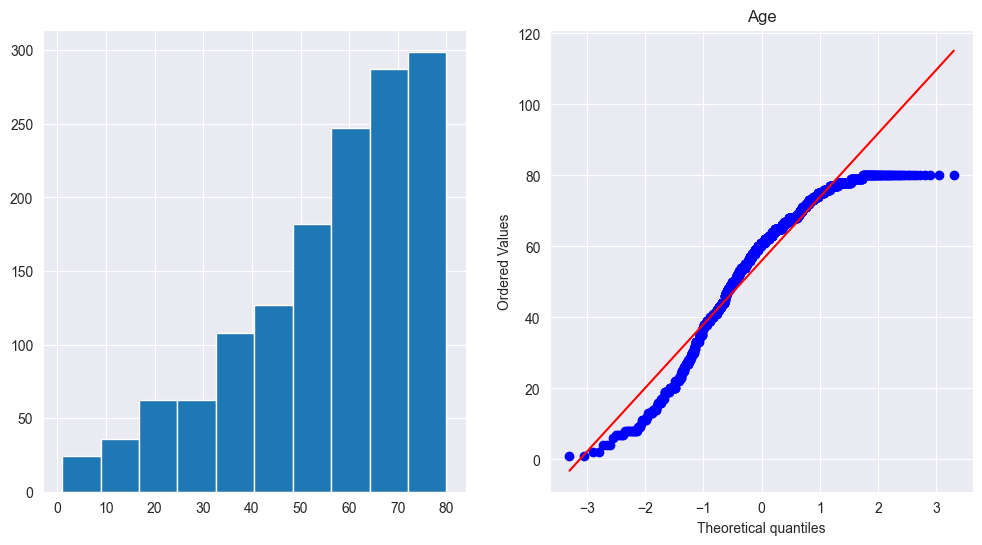

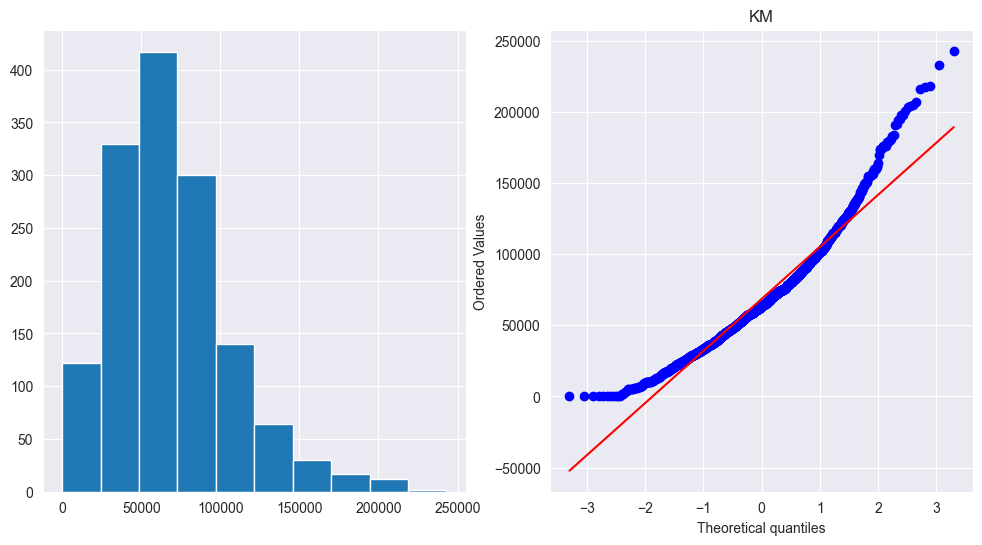

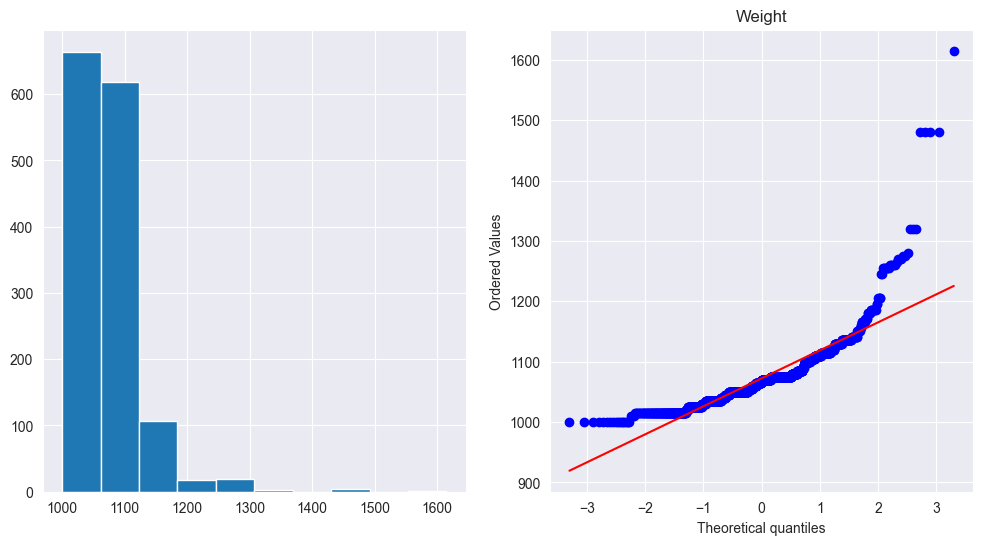

In [32]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

### Log transformation and visualizing the Histogram to determine any possible changes in distribution


Text(0.5, 1.0, 'Weight')

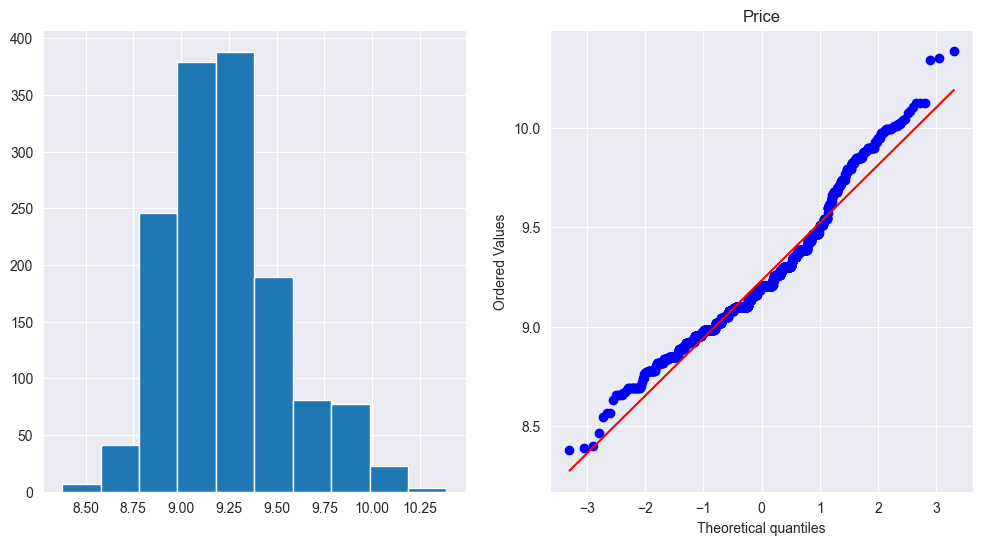

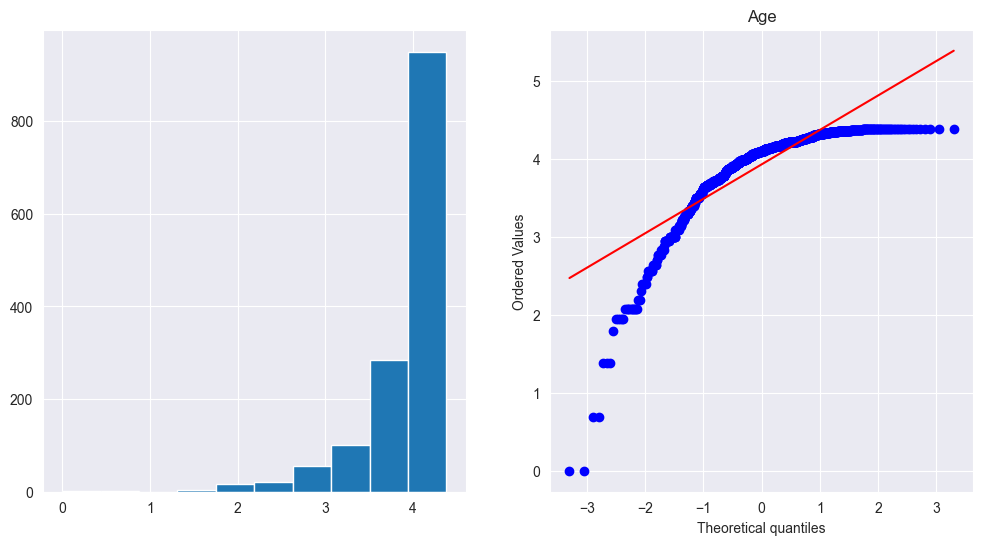

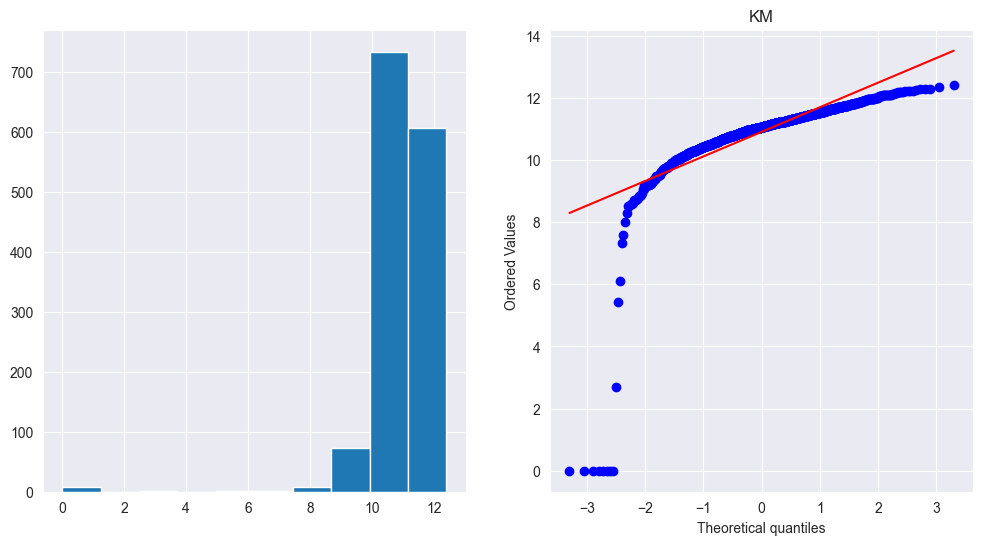

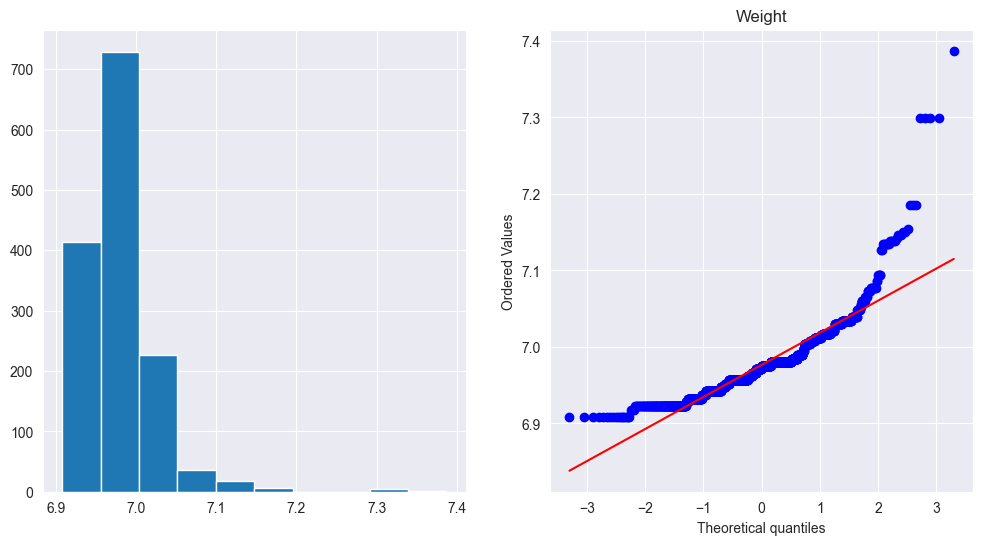

In [33]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [34]:
#Before transformatio
df_model = smf.ols("Price~Age+KM+Weight+CC+HP+QT", data = df).fit()
# Finding rsquared values
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     706.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:50:17   Log-Likelihood:                 701.03
No. Observations:                1434   AIC:                            -1388.
Df Residuals:                    1427   BIC:                            -1351.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9363      0.961      7.216      0.000       5.051       8.822
Age           -0.4568      0.012    -39.456      0.000      -0.479      -0.434
KM             0.0147      0.005      2.955      0.003       0.005       0.025
Weight         0.5000      0.138      3.624      0.000       0.229       0.771
CC         -9.043e-06      1e-05     -0.904      0.366   -2.87e-05    1.06e-05
HP             0.0043      0.000     14.242      0.000       0.004       0.005
QT             0.0003      0.000      2.135      0.033    2.53e-05       0.001
==============================================================================
Omnibus:                      405.881   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2094.168
Skew:                          -1.226   Prob(JB):                         0.00
Kurtosis:                       8.388   Cond. No.                     4.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square root transformation and visualizing the Histogram to determine any possible changes in distribution.


Text(0.5, 1.0, 'Weight')

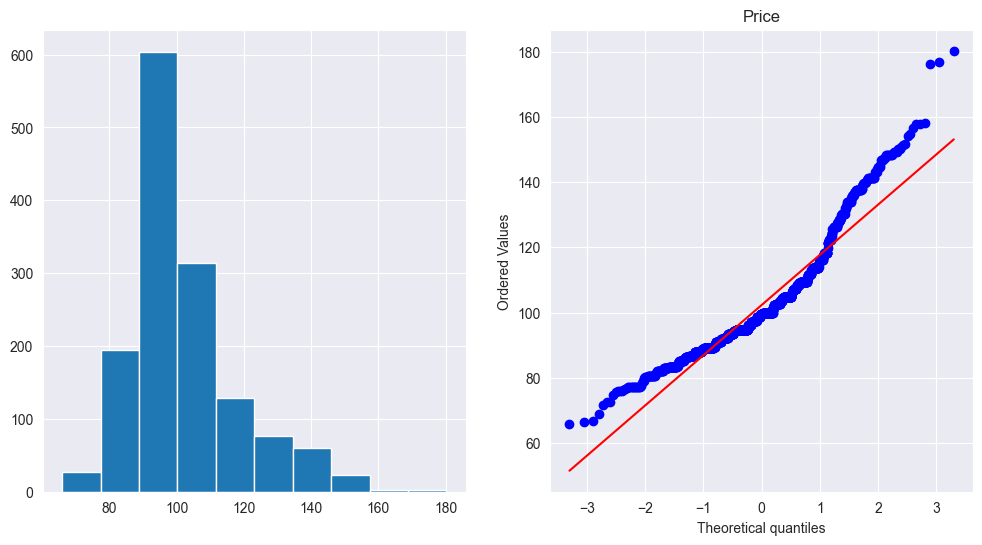

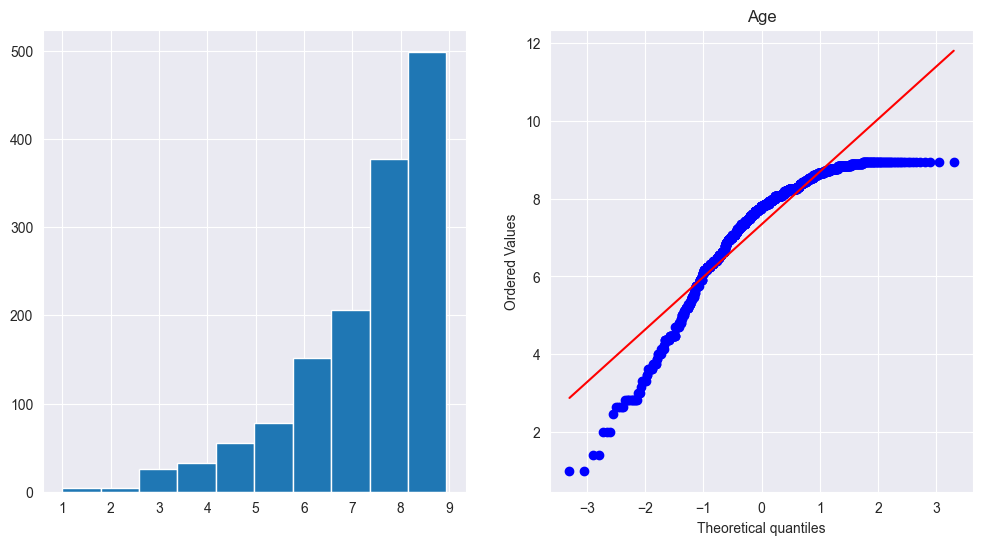

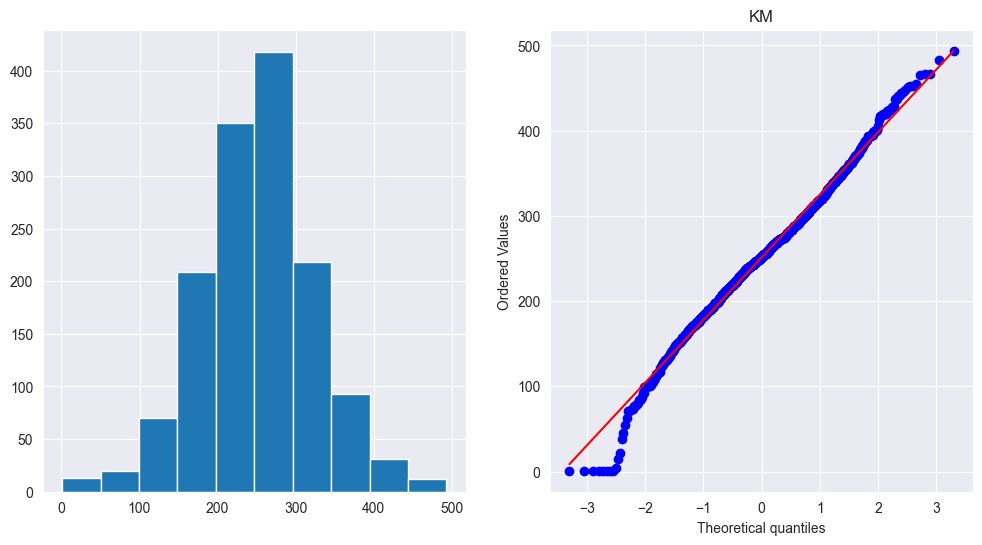

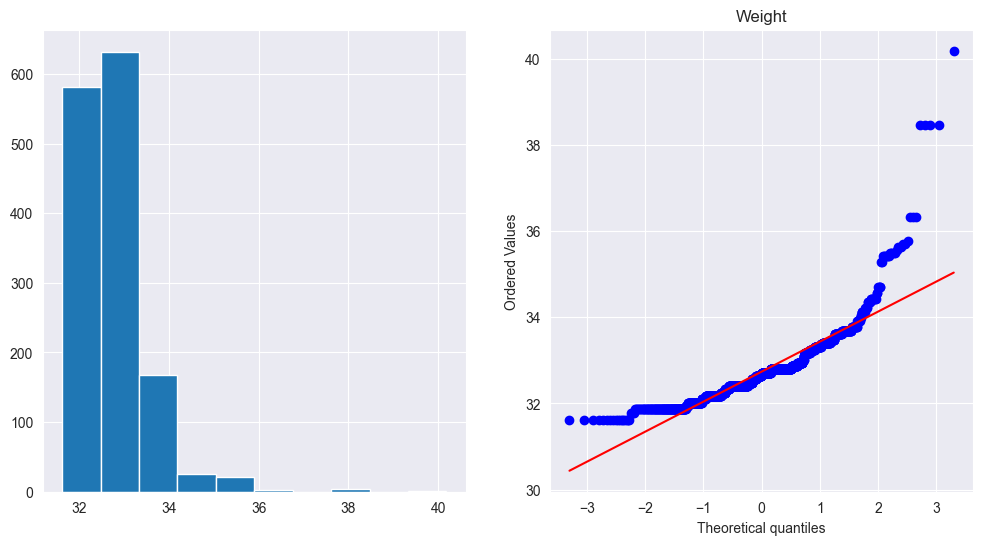

In [35]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [36]:
#Before transformatio
df_S_model = smf.ols("Price~Age+KM+Weight+CC+HP+QT", data = df).fit()
# Finding rsquared values
df_S_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:50:20   Log-Likelihood:                -4587.7
No. Observations:                1434   AIC:                             9189.
Df Residuals:                    1427   BIC:                             9226.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5826     10.293      5.691      0.000      38.391      78.774
Age           -7.3649      0.164    -45.015      0.000      -7.686      -7.044
KM            -0.0442      0.003    -14.719      0.000      -0.050      -0.038
Weight         2.7105      0.320      8.461      0.000       2.082       3.339
CC            -0.0003      0.000     -0.757      0.449      -0.001       0.000
HP             0.1764      0.012     14.646      0.000       0.153       0.200
QT             0.0312      0.006      5.360      0.000       0.020       0.043
==============================================================================
Omnibus:                      126.093   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.069
Skew:                          -0.418   Prob(JB):                     2.98e-88
Kurtosis:                       5.459   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution


Text(0.5, 1.0, 'Weight')

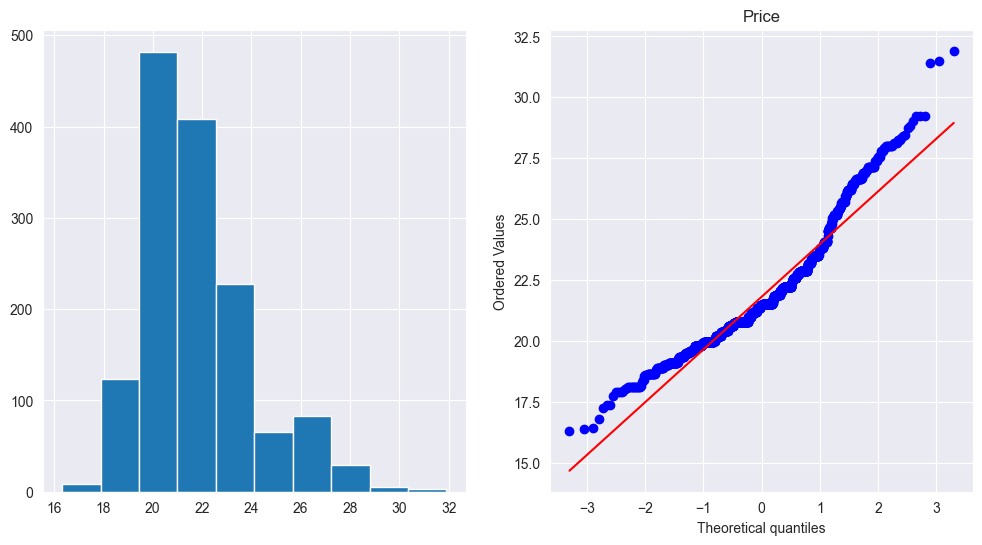

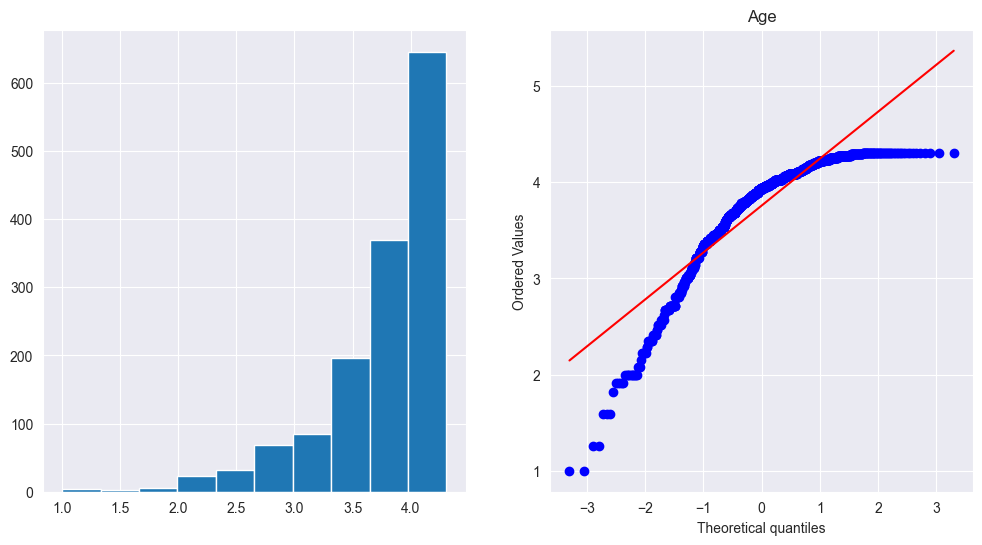

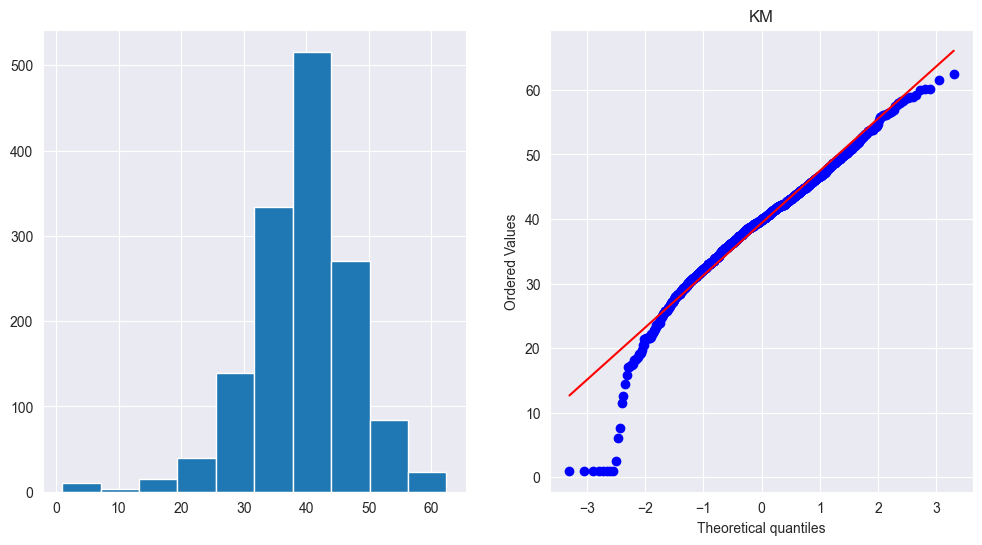

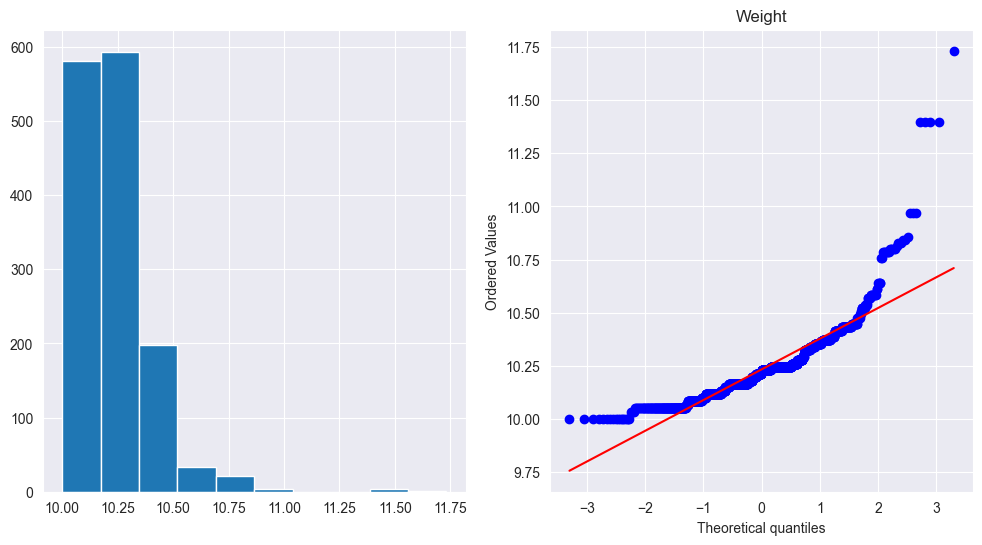

In [37]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [38]:
#Before transformatio
df_c_model = smf.ols("Price~Age+KM+Weight+CC+HP+QT", data = df).fit()
# Finding rsquared values
df_c_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1253.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:50:24   Log-Likelihood:                -1872.7
No. Observations:                1434   AIC:                             3759.
Df Residuals:                    1427   BIC:                             3796.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9549      2.410      7.036      0.000      12.228      21.682
Age           -2.8473      0.069    -40.996      0.000      -2.984      -2.711
KM            -0.0475      0.004    -11.423      0.000      -0.056      -0.039
Weight         1.4041      0.236      5.949      0.000       0.941       1.867
CC         -4.112e-05   6.02e-05     -0.683      0.494      -0.000    7.69e-05
HP             0.0268      0.002     14.840      0.000       0.023       0.030
QT             0.0046      0.001      5.223      0.000       0.003       0.006
==============================================================================
Omnibus:                      218.396   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.075
Skew:                          -0.714   Prob(JB):                    1.01e-172
Kurtosis:                       6.349   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# So we see the squre root transformation give better r2 score than log and cubrt transformation.

Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.
## The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.
To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [40]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [41]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))


Price feature ShapiroResult(statistic=0.8515530228614807, pvalue=1.0932398223897191e-34) 
Age feature ShapiroResult(statistic=0.9260366559028625, pvalue=5.421720823555484e-26) 
Weight feature ShapiroResult(statistic=0.7803849577903748, pvalue=3.716649903944069e-40) 
KM feature ShapiroResult(statistic=0.9476848244667053, pvalue=3.6768435712181544e-22)


#### Since the p-values are less than .05, we reject the null hypothesis.
We have sufficient evidence to say that the sample data does not come from a normal distribution.

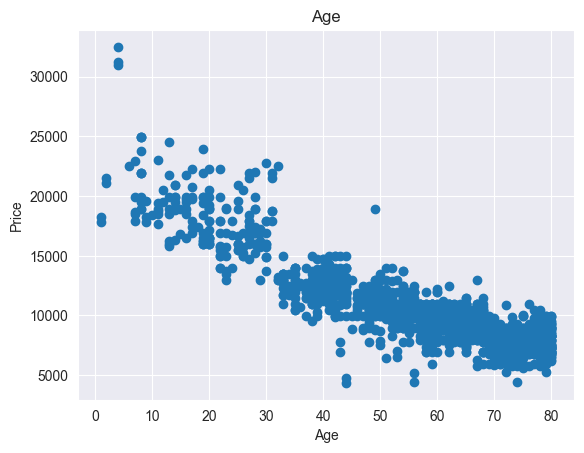

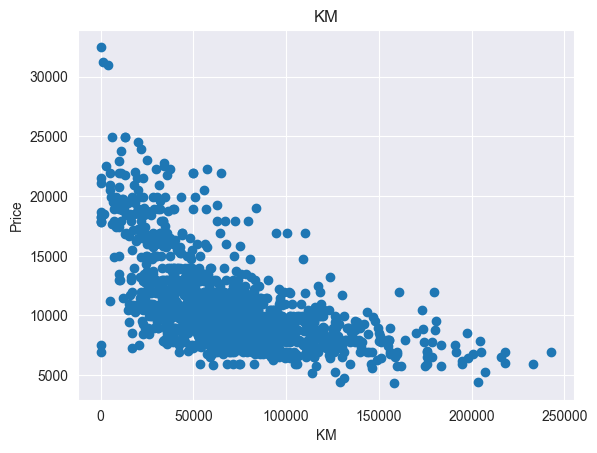

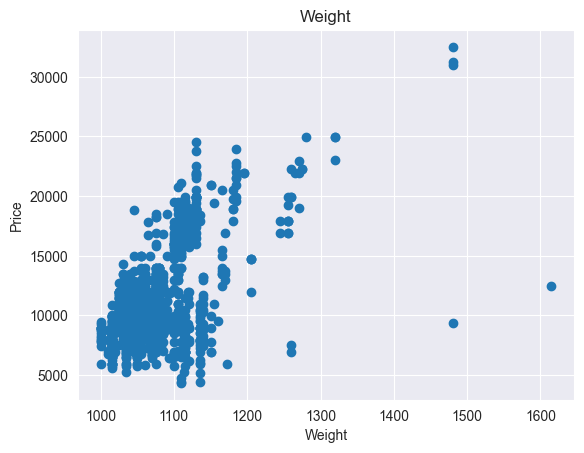

In [42]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

In [43]:
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876362,-0.570735,0.317251,0.125624,0.188606,0.063600,0.215895,0.579296
Age,-0.876362,1.000000,0.505705,-0.157875,-0.097650,-0.150703,-0.005634,-0.196427,-0.468986
KM,-0.570735,0.505705,1.000000,-0.333913,0.102303,-0.036968,0.014937,0.278718,-0.028749
HP,0.317251,-0.157875,-0.333913,1.000000,0.036326,0.091713,0.209425,-0.297842,0.091855
CC,0.125624,-0.097650,0.102303,0.036326,1.000000,0.080441,0.014692,0.305982,0.334936
Doors,0.188606,-0.150703,-0.036968,0.091713,0.080441,1.000000,-0.160488,0.112027,0.306928
Gears,0.063600,-0.005634,0.014937,0.209425,0.014692,-0.160488,1.000000,-0.005181,0.021067
QT,0.215895,-0.196427,0.278718,-0.297842,0.305982,0.112027,-0.005181,1.000000,0.623661
Weight,0.579296,-0.468986,-0.028749,0.091855,0.334936,0.306928,0.021067,0.623661,1.000000


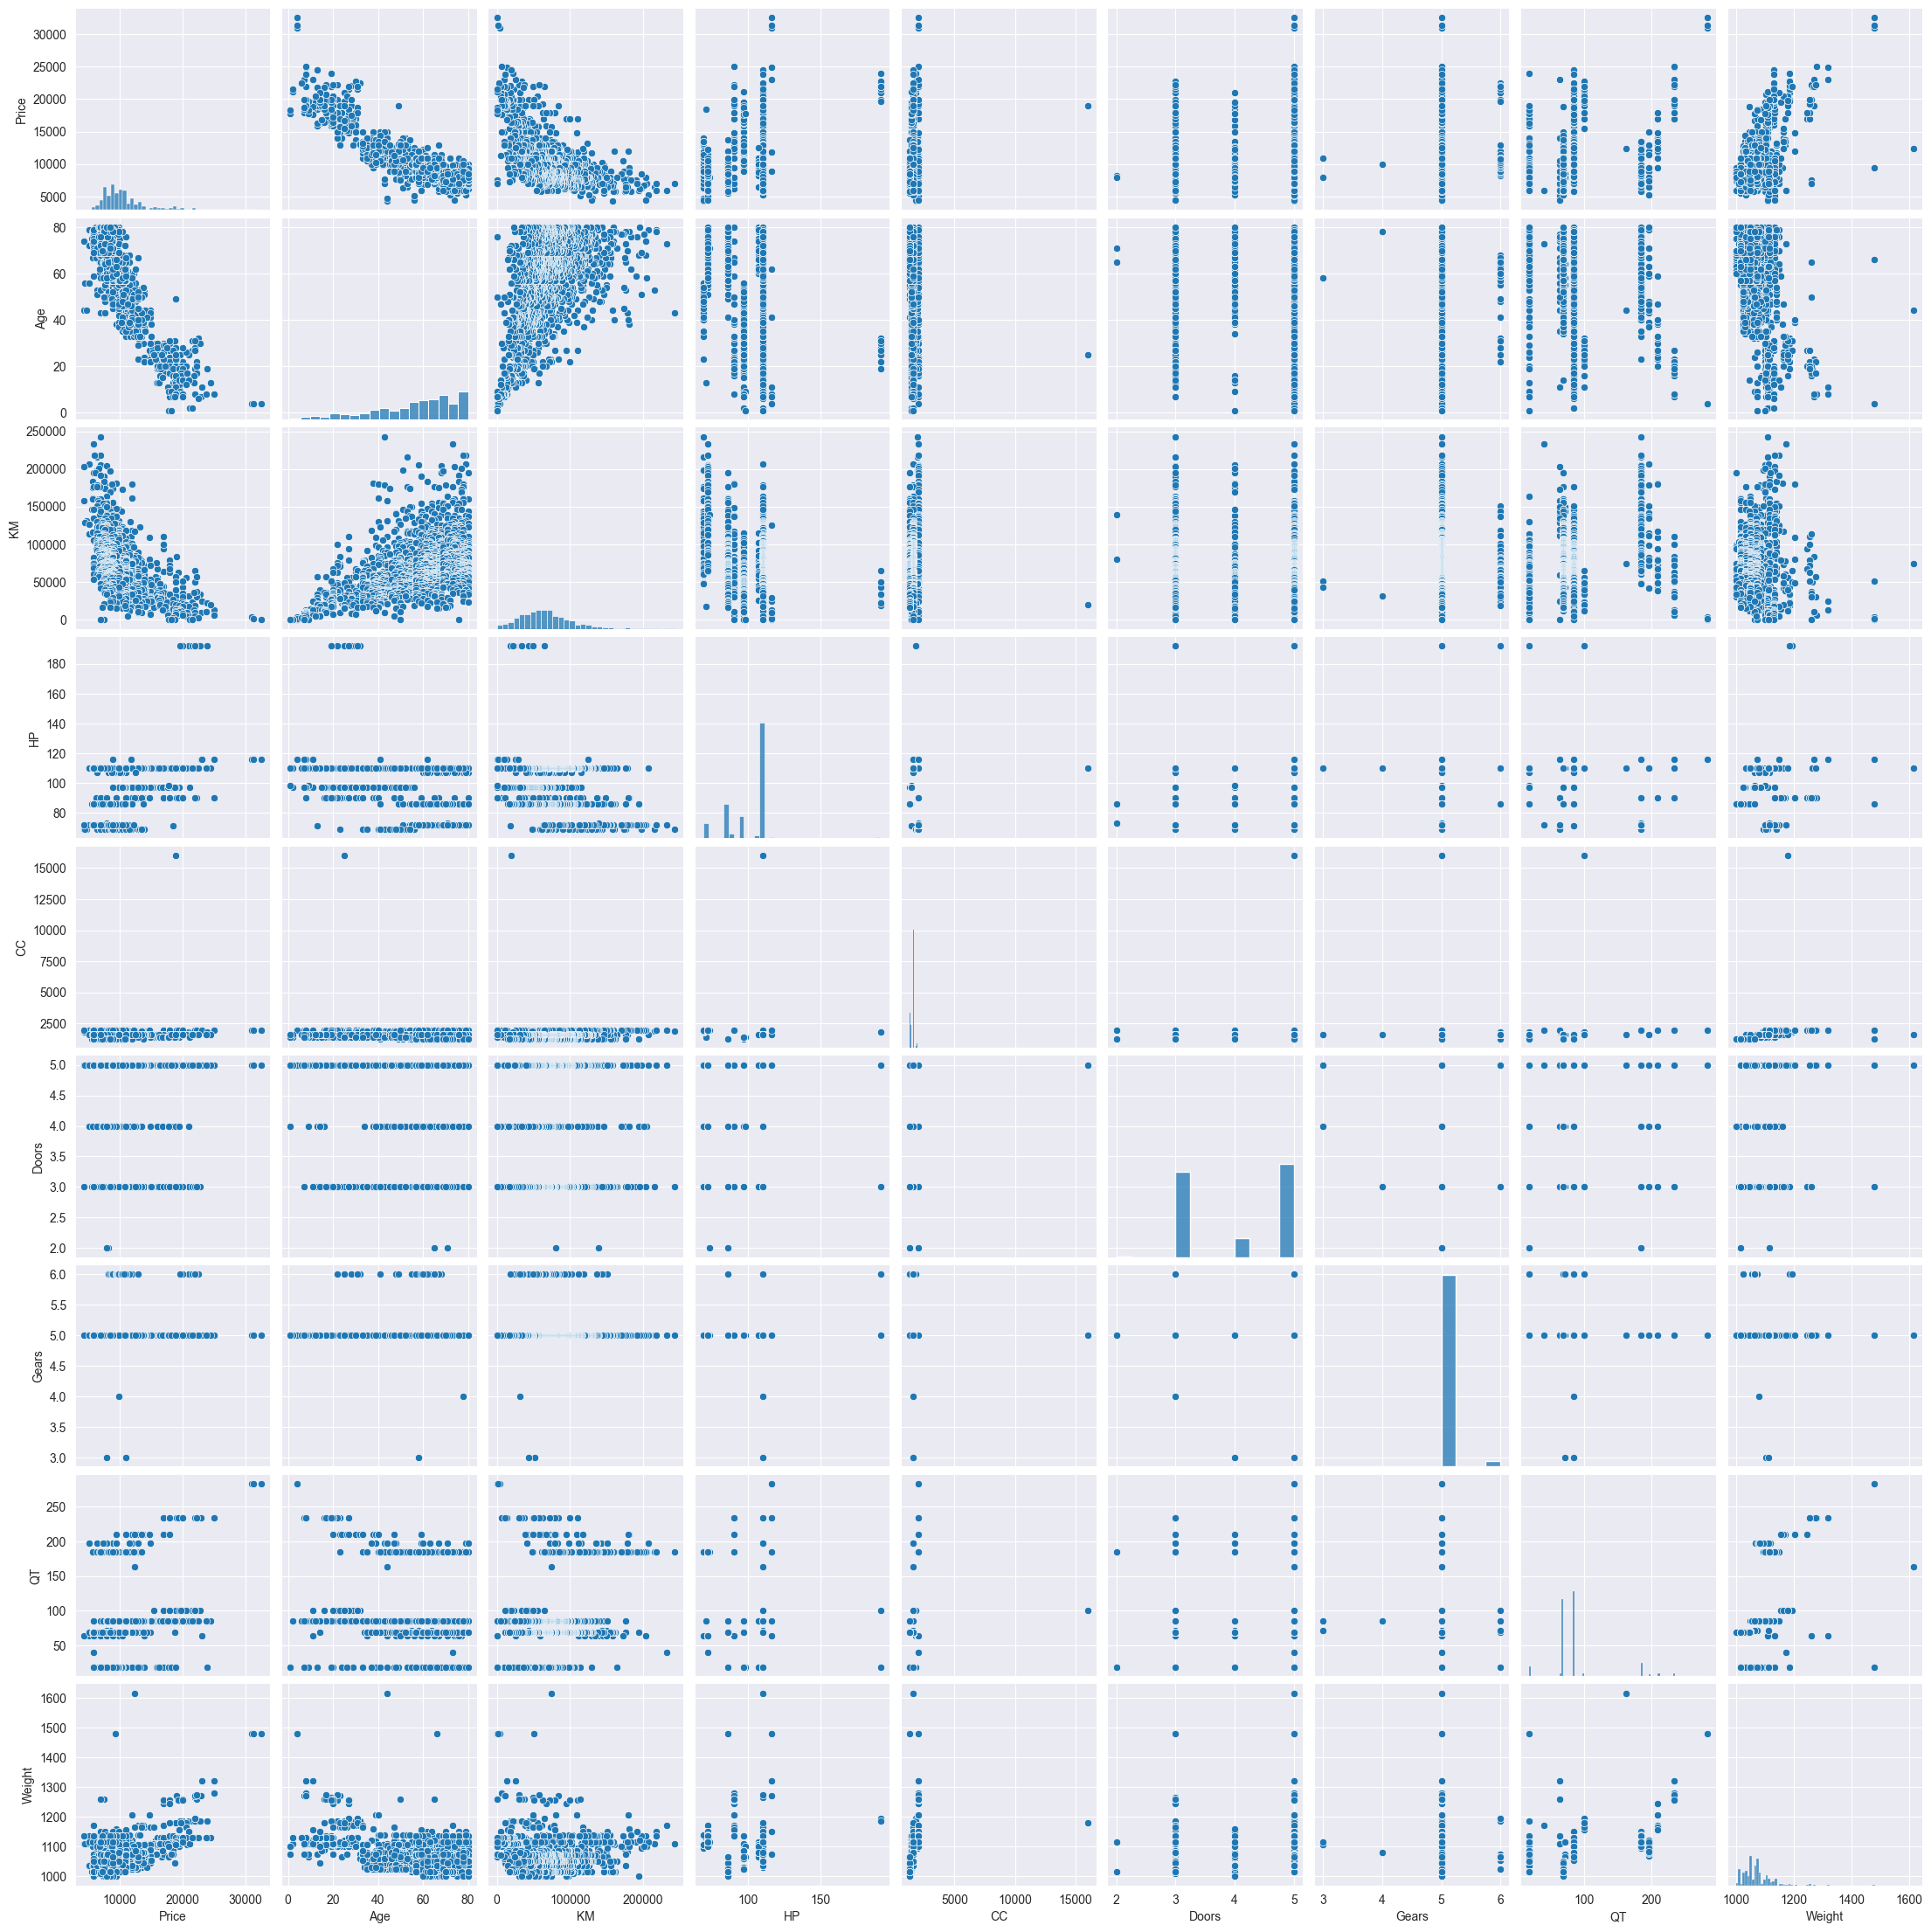

In [44]:
sns.pairplot(df)

#### Age feature has a good linear relation with Price a Negative Correlation as compare to other features
### Now we analyze the relationship between the discrete variables and Price

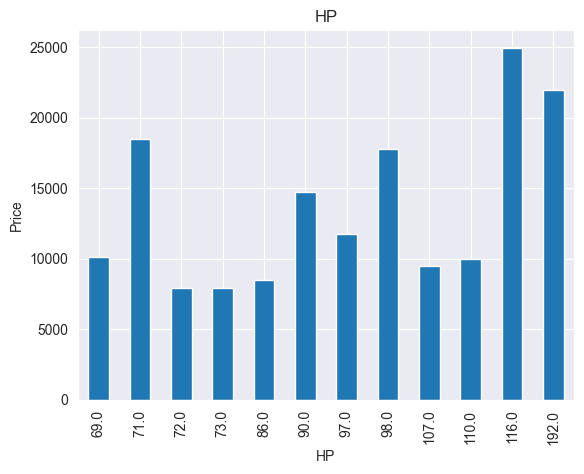

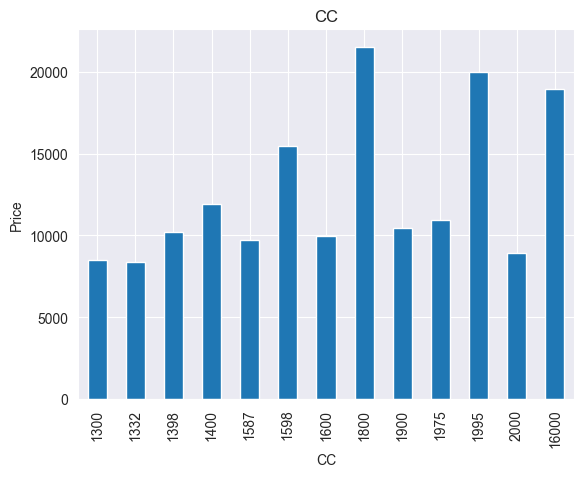

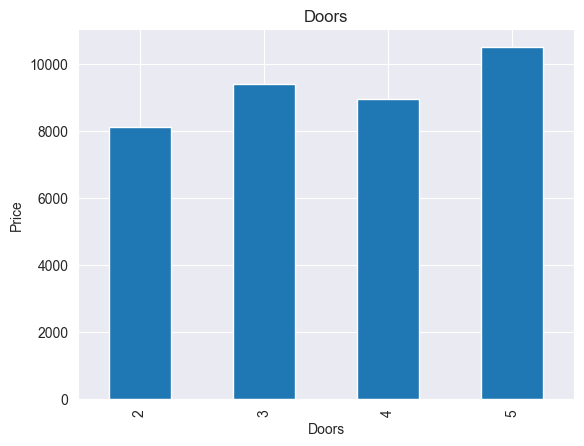

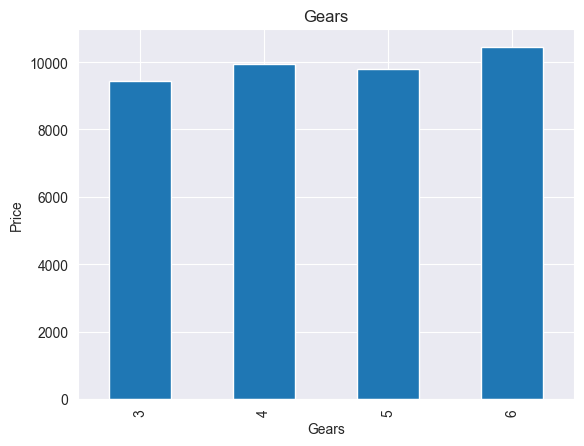

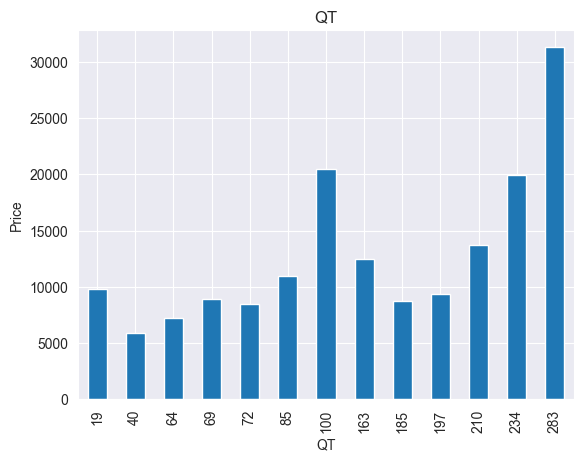

In [45]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()


#### There is not major difference between how much Gears and Doors of each Car has to have a significant amount of changes in Prices from each other and there is not  any direct relation between them.
### Visualizing Continuous Datatype for Outlier Detection

<AxesSubplot: xlabel='KM'>

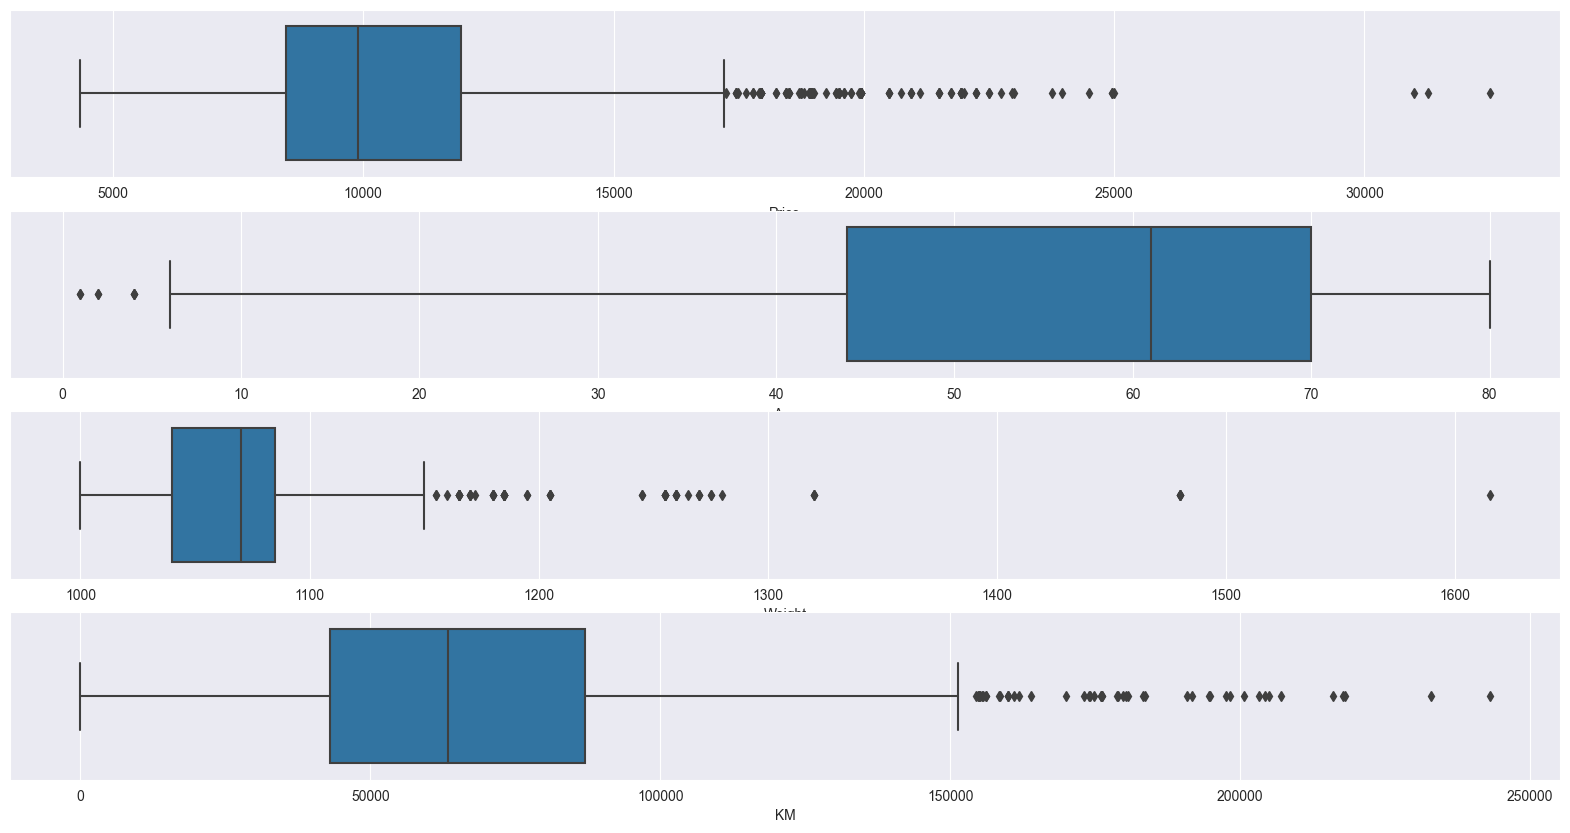

In [46]:
fig,ax=plt.subplots(4,1,figsize=(20,10))
sns.boxplot(x="Price",data=df,ax=ax[0])
sns.boxplot(x="Age",data=df,ax=ax[1])
sns.boxplot(x="Weight",data=df,ax=ax[2])
sns.boxplot(x="KM",data=df,ax=ax[3])


##### As we can see above in boxplot A significant amount of outliers are present in each continuous feature
##### We can not simply remove the outliers that would mean loss of information which resulted in in-accurate output.

We need to try different types of transformation or imputation and select the one with the best results.

Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by the extreme values.¶

#### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

### Median Imputation to handle Outlier in Profit


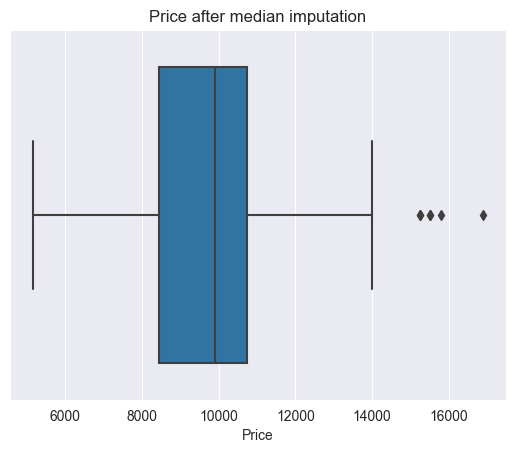

In [47]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    q2 = np.median(df1.Price)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    if i > ub or i < lb:
        df1['Price'] = df1['Price'].replace(i, q2)
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()
    

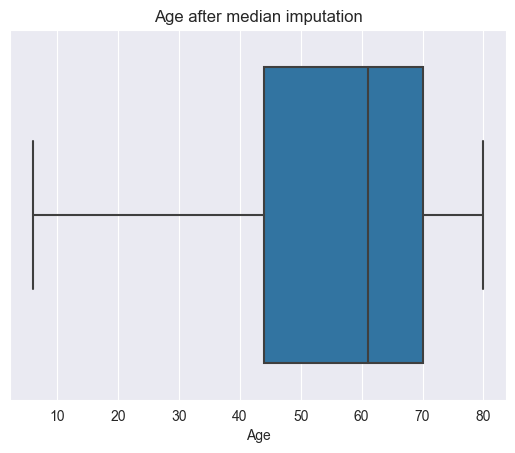

In [48]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    q2 = np.median(df1.Age)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    if i > ub or i < lb:
        df1['Age'] = df1['Age'].replace(i, q2)
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()
    

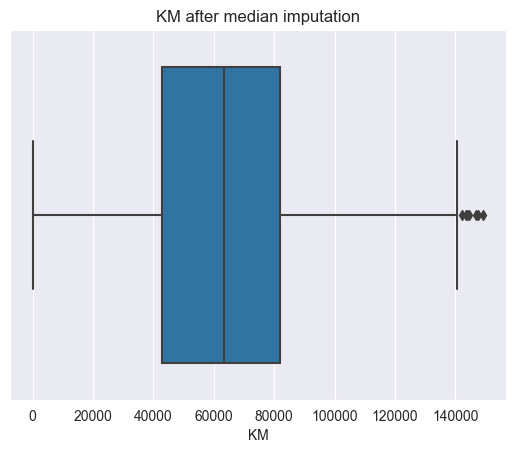

In [49]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    q2 = np.median(df1.KM)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    if i > ub or i < lb:
        df1['KM'] = df1['KM'].replace(i, q2)
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()
    

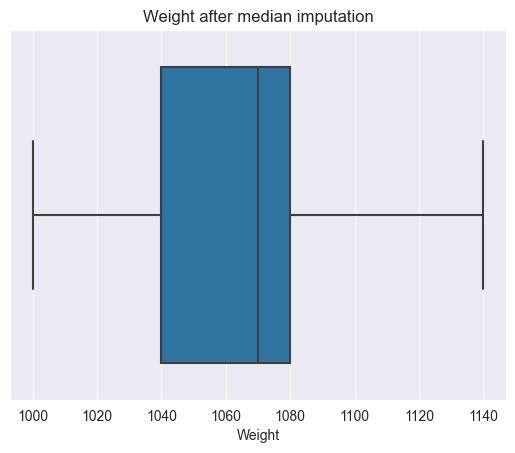

In [50]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    q2 = np.median(df1.Weight)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    if i > ub or i < lb:
        df1['Weight'] = df1['Weight'].replace(i, q2)
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()
    

In [51]:
median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     246.7
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          5.42e-129
Time:                        23:51:11   Log-Likelihood:                -12475.
No. Observations:                1434   AIC:                         2.496e+04
Df Residuals:                    1430   BIC:                         2.498e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.49e+04   1427.121     10.442      0.000    1.21e+04    1.77e+04
Age          -53.7629      2.707    -19.858      0.000     -59.074     -48.452
KM            -0.0049      0.002     -3.200      0.001      -0.008      -0.002
Weight        -1.7905      1.295     -1.383      0.167      -4.331       0.750
==============================================================================
Omnibus:                       14.979   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.674
Skew:                           0.222   Prob(JB):                     0.000651
Kurtosis:                       2.779   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Mean Imputation to handle Outlier in Profit


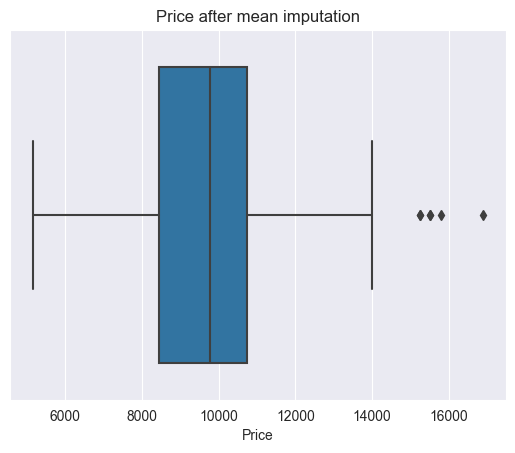

In [52]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    
    if i > ub or i < lb:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

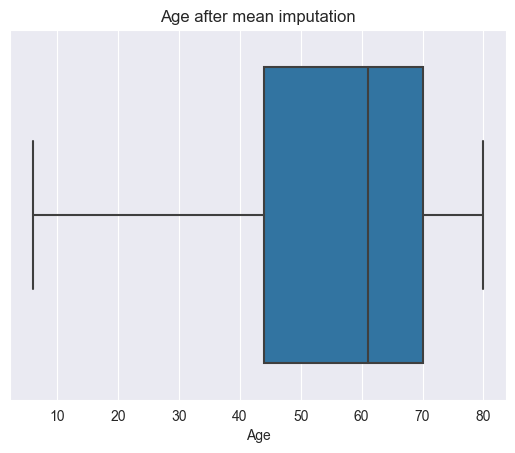

In [53]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    
    if i > ub or i < lb:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

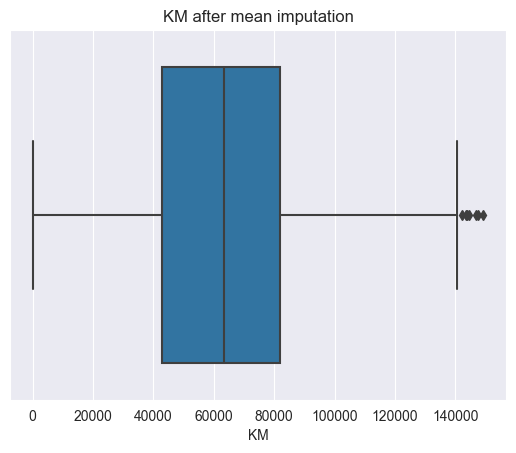

In [54]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    
    if i > ub or i < lb:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

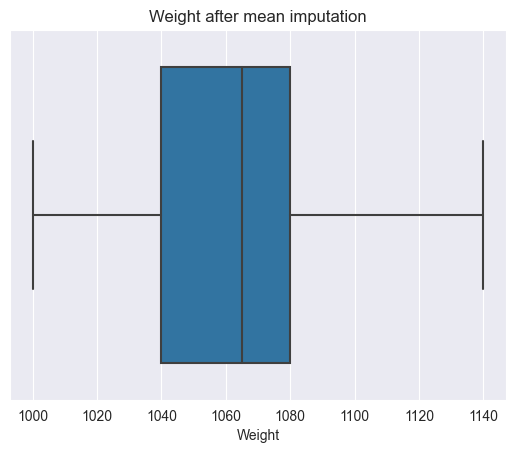

In [55]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)
    if i > ub or i < lb:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

In [56]:
mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
mean_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     301.1
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          1.68e-151
Time:                        23:51:16   Log-Likelihood:                -12433.
No. Observations:                1434   AIC:                         2.487e+04
Df Residuals:                    1430   BIC:                         2.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.439e+04   1387.676     10.370      0.000    1.17e+04    1.71e+04
Age          -56.9595      2.642    -21.563      0.000     -62.141     -51.778
KM            -0.0055      0.001     -3.652      0.000      -0.008      -0.003
Weight        -1.0703      1.259     -0.850      0.396      -3.541       1.400
==============================================================================
Omnibus:                        8.335   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.437
Skew:                           0.179   Prob(JB):                       0.0147
Kurtosis:                       2.885   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Robust transformation
##### The Robust Scaler, as the name suggests is not sensitive to outliers.

This scaler removes the median from the data

Scales the data by the InterQuartile Range(IQR)

The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [57]:
df_robust_scaled = df.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.028571,-1.461538,-0.372280,90.0,2000,3,5,210,2.111111
1,1.100000,-1.461538,0.216682,90.0,2000,3,5,210,2.111111
2,1.157143,-1.423077,-0.491997,90.0,2000,3,5,210,2.111111
3,1.442857,-1.346154,-0.349267,90.0,2000,3,5,210,2.111111
4,1.100000,-1.192308,-0.564871,90.0,2000,3,5,210,2.222222


In [58]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:51:16   Log-Likelihood:                -655.89
No. Observations:                1434   AIC:                             1330.
Df Residuals:                    1425   BIC:                             1377.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7469      0.293     -5.965      0.000      -2.321      -1.172
Age           -0.9036      0.019    -46.506      0.000      -0.942      -0.866
KM            -0.2618      0.016    -16.603      0.000      -0.293      -0.231
HP             0.0091      0.001     11.269      0.000       0.007       0.011
CC         -3.418e-05   2.57e-05     -1.328      0.184   -8.47e-05    1.63e-05
Doors          0.0007      0.011      0.062      0.951      -0.022       0.023
Gears          0.1709      0.056      3.036      0.002       0.060       0.281
QT             0.0011      0.000      2.996      0.003       0.000       0.002
Weight         0.2167      0.014     15.756      0.000       0.190       0.244
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                     4.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying Standard Scaler
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler


In [59]:
from sklearn.preprocessing import StandardScaler

col_names = data.columns
features = data[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.767483,-1.774835,-0.575235,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
1,0.836547,-1.774835,0.116761,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
2,0.891798,-1.721023,-0.715895,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
3,1.168054,-1.613398,-0.548196,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
4,0.836547,-1.398148,-0.801518,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.862104


In [60]:
standard_scaler_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
standard_scaler_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:51:17   Log-Likelihood:                -607.62
No. Observations:                1434   AIC:                             1233.
Df Residuals:                    1425   BIC:                             1281.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.281e-16      0.010   2.33e-14      1.000      -0.019       0.019
Age           -0.6245      0.013    -46.506      0.000      -0.651      -0.598
KM            -0.2154      0.013    -16.603      0.000      -0.241      -0.190
HP             0.1315      0.012     11.269      0.000       0.109       0.154
CC            -0.0140      0.011     -1.328      0.184      -0.035       0.007
Doors          0.0007      0.011      0.062      0.951      -0.020       0.021
Gears          0.0312      0.010      3.036      0.002       0.011       0.051
QT             0.0445      0.015      2.996      0.003       0.015       0.074
Weight         0.2443      0.016     15.756      0.000       0.214       0.275
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:51:17   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5511.7091   1411.853     -3.904      0.000   -8281.243   -2742.176
Age         -121.6427      2.616    -46.506      0.000    -126.774    -116.512
KM            -0.0208      0.001    -16.603      0.000      -0.023      -0.018
Weight        16.8558      1.070     15.756      0.000      14.757      18.954
HP            31.7613      2.819     11.269      0.000      26.232      37.290
CC            -0.1196      0.090     -1.328      0.184      -0.296       0.057
Gears        598.2014    197.041      3.036      0.002     211.680     984.722
QT             3.9246      1.310      2.996      0.003       1.355       6.495
Doors          2.4778     40.087      0.062      0.951     -76.158      81.113
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 #### After the transformation and building models the R-Squared had varince with respect to other transformations
But standard scaler is better than raw data model and other models with better AIC, BIC log-likelihood scores

We have to perform model validation test to check which model is better will do at the end of this

## Preparing a Model


In [62]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:51:17   Log-Likelihood:                -607.62
No. Observations:                1434   AIC:                             1233.
Df Residuals:                    1425   BIC:                             1281.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.281e-16      0.010   2.33e-14      1.000      -0.019       0.019
Age           -0.6245      0.013    -46.506      0.000      -0.651      -0.598
KM            -0.2154      0.013    -16.603      0.000      -0.241      -0.190
HP             0.1315      0.012     11.269      0.000       0.109       0.154
CC            -0.0140      0.011     -1.328      0.184      -0.035       0.007
Doors          0.0007      0.011      0.062      0.951      -0.020       0.021
Gears          0.0312      0.010      3.036      0.002       0.011       0.051
QT             0.0445      0.015      2.996      0.003       0.015       0.074
Weight         0.2443      0.016     15.756      0.000       0.214       0.275
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.165
Skew:                          -0.204   Prob(JB):                    2.17e-216
Kurtosis:                       7.056   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


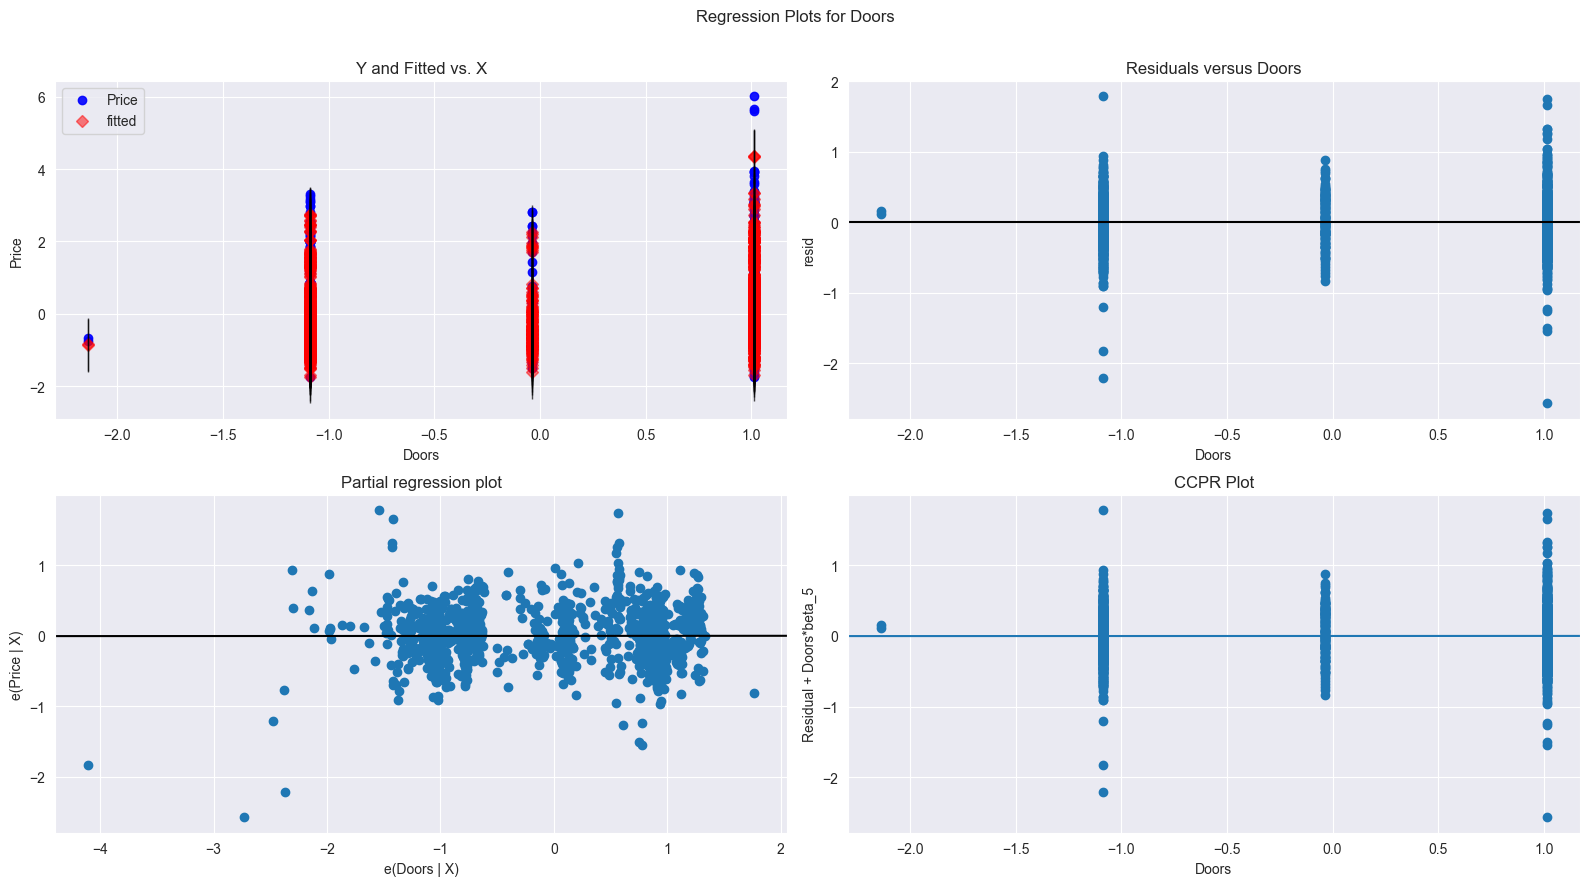

In [63]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

eval_env: 1


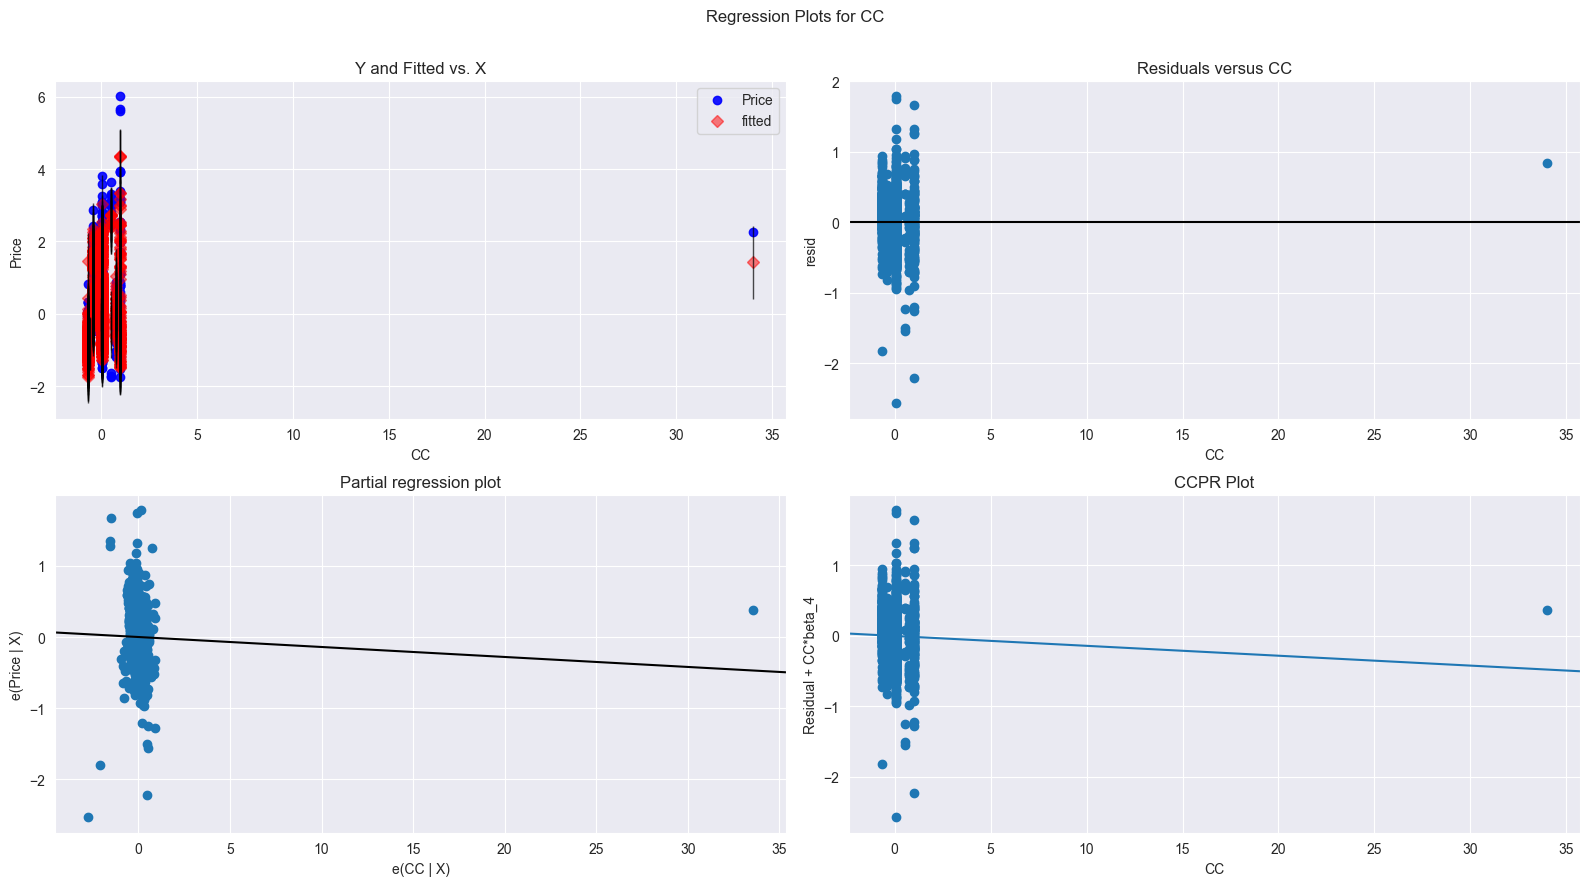

In [64]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

#### We generally want a VIF that is less than 5. As you can see weight and QT has the highest value among others lets investigate

In [65]:
df_standard_scaled

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.767483,-1.774835,-0.575235,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
1,0.836547,-1.774835,0.116761,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
2,0.891798,-1.721023,-0.715895,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
3,1.168054,-1.613398,-0.548196,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.766787
4,0.836547,-1.398148,-0.801518,-0.768434,0.997535,-1.086788,-0.140525,2.997992,1.862104
...,...,...,...,...,...,...,...,...,...
1429,-0.890050,0.700537,-1.280323,-1.035407,-0.652000,-1.086788,-0.140525,-0.439803,-0.902078
1430,0.034025,0.861975,-1.321495,-1.035407,-0.652000,-1.086788,-0.140525,-0.439803,-1.092711
1431,-0.613795,0.808162,-1.374399,-1.035407,-0.652000,-1.086788,-0.140525,-0.439803,-1.092711
1432,-0.959114,0.754350,-1.377066,-1.035407,-0.652000,-1.086788,-0.140525,-0.439803,-1.092711


In [66]:
x=df_standard_scaled.iloc[:,7:9]
x


,QT,Weight
0,2.997992,1.766787
1,2.997992,1.766787
2,2.997992,1.766787
3,2.997992,1.766787
4,2.997992,1.862104
...,...,...
1429,-0.439803,-0.902078
1430,-0.439803,-1.092711
1431,-0.439803,-1.092711
1432,-0.439803,-1.092711


In [67]:
wt_qt_model=smf.ols('Price~x',data=df_standard_scaled).fit()
wt_qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     420.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          2.19e-144
Time:                        23:51:22   Log-Likelihood:                -1703.3
No. Observations:                1434   AIC:                             3413.
Df Residuals:                    1431   BIC:                             3428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.995e-16      0.021   9.51e-15      1.000      -0.041       0.041
x[0]          -0.2379      0.027     -8.866      0.000      -0.291      -0.185
x[1]           0.7277      0.027     27.114      0.000       0.675       0.780
==============================================================================
Omnibus:                      285.311   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3082.929
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                      10.084   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1278.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:                -612.24
No. Observations:                1434   AIC:                             1240.
Df Residuals:                    1426   BIC:                             1283.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.281e-16      0.010   2.32e-14      1.000      -0.019       0.019
Age           -0.6252      0.013    -46.431      0.000      -0.652      -0.599
KM            -0.2125      0.013    -16.374      0.000      -0.238      -0.187
HP             0.1400      0.011     12.328      0.000       0.118       0.162
CC            -0.0145      0.011     -1.370      0.171      -0.035       0.006
Doors         -0.0054      0.010     -0.524      0.600      -0.026       0.015
QT             0.0465      0.015      3.123      0.002       0.017       0.076
Weight         0.2447      0.016     15.738      0.000       0.214       0.275
==============================================================================
Omnibus:                      149.170   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.907
Skew:                          -0.217   Prob(JB):                    3.30e-212
Kurtosis:                       7.014   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

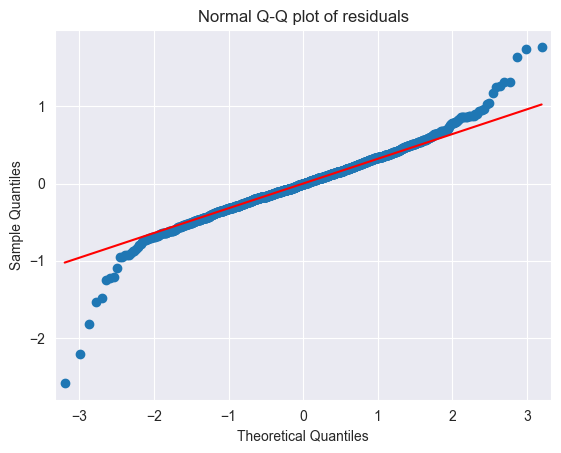

In [69]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)
#Residuals values  = y - yhat
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.


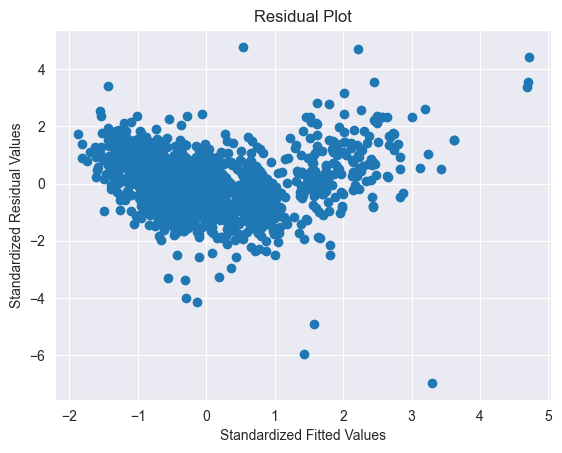

In [70]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


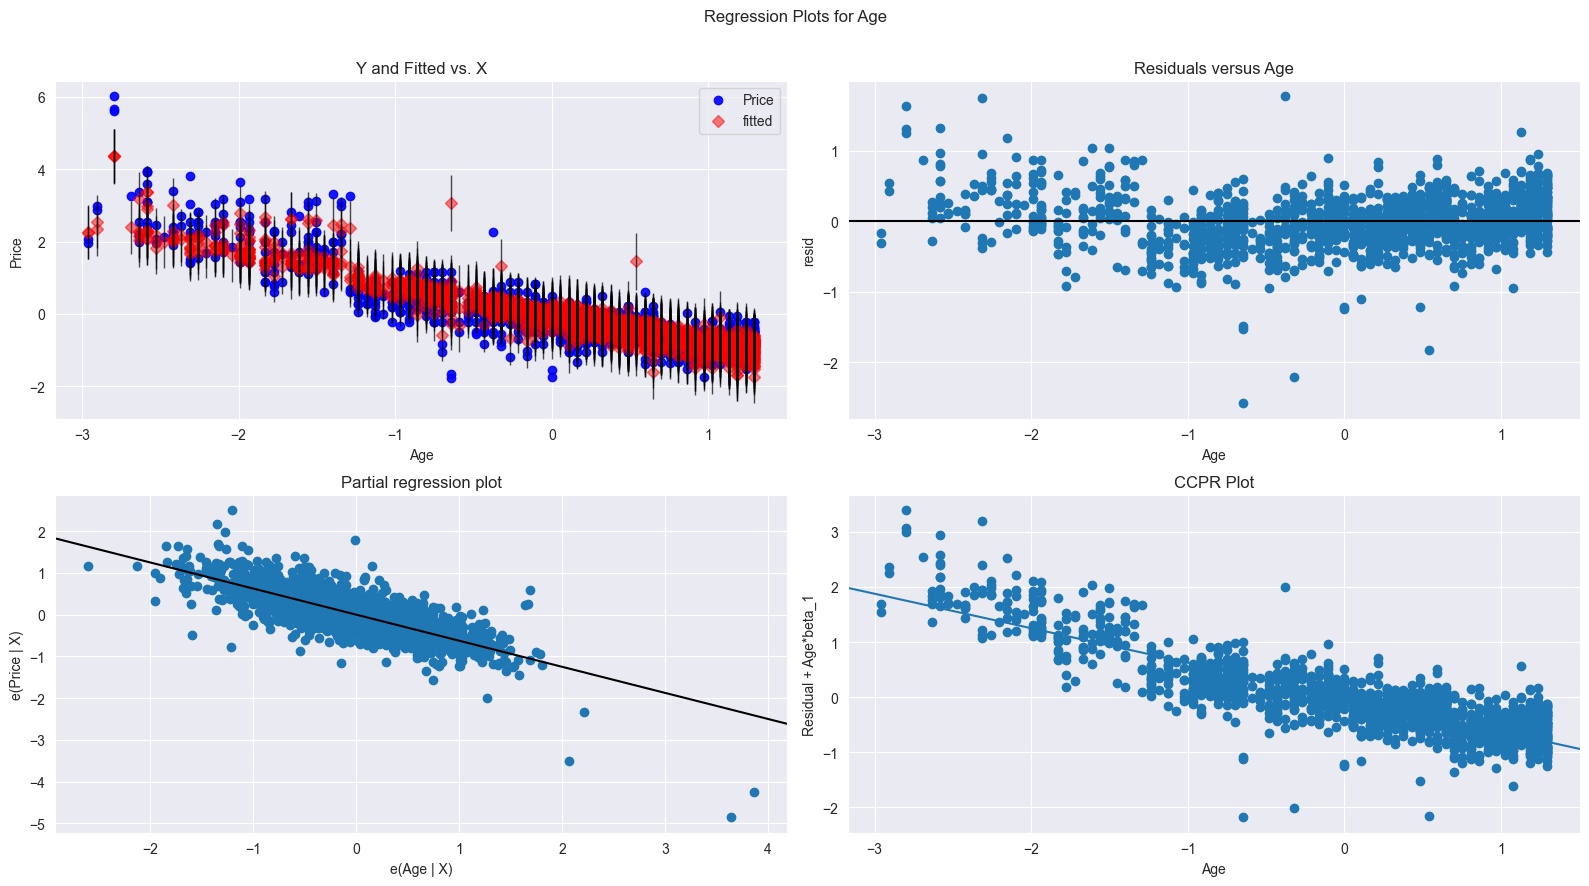

In [71]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (25,15))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

In [ ]:
### Predicting values from Model using same dataset
x=data.iloc[:,1:9]
y=data.iloc[:,:-8]
x


In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train

In [ ]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

In [ ]:
y_prediction = LR.predict(x_test)
y_prediction